### Visualizing a supervised problem in an unsupervised setup. 
#### This gives an understanding of how data points are distributed  in the feature space

In [35]:
import sys
print(sys.version)

3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets
from sklearn import manifold

In [4]:
%matplotlib inline

In [5]:
data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

In [9]:
pixel_values.shape

(70000, 784)

In [12]:
targets.shape

(70000,)

In [13]:
print(type(pixel_values),type(targets))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [11]:
pixel_values.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
single_image = pixel_values.iloc[1,:].values.reshape(28,28)
single_image.shape

(28, 28)

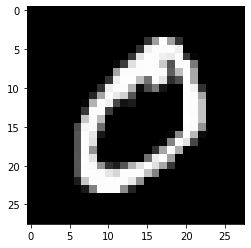

In [33]:
plt.imshow(single_image,cmap='gray')

#### Compress the high dimension input into 2 dimensional data for visualizing

In [36]:
tsne = manifold.TSNE(n_components=2,random_state=23)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000,:])

In [37]:
type(transformed_data)

numpy.ndarray

In [46]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:3000])),columns=["x","y","targets"])

In [48]:
tsne_df.loc[:,"targets"]=tsne_df.targets.astype(int)

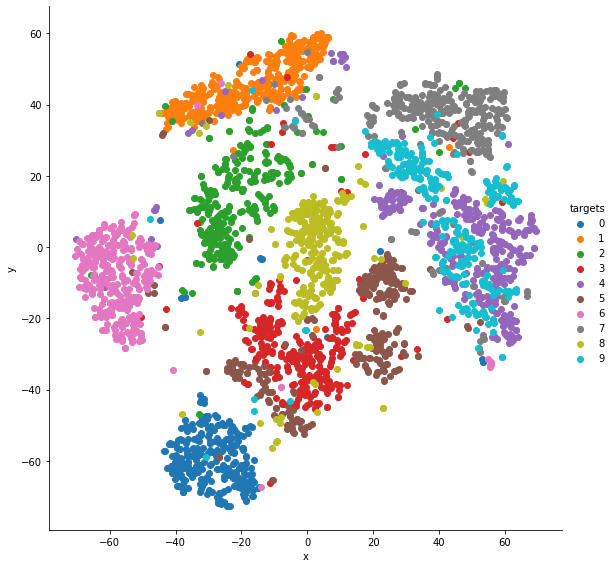

In [50]:
grid = sns.FacetGrid(tsne_df,hue="targets",height=8)
grid.map(plt.scatter,"x","y").add_legend()